In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

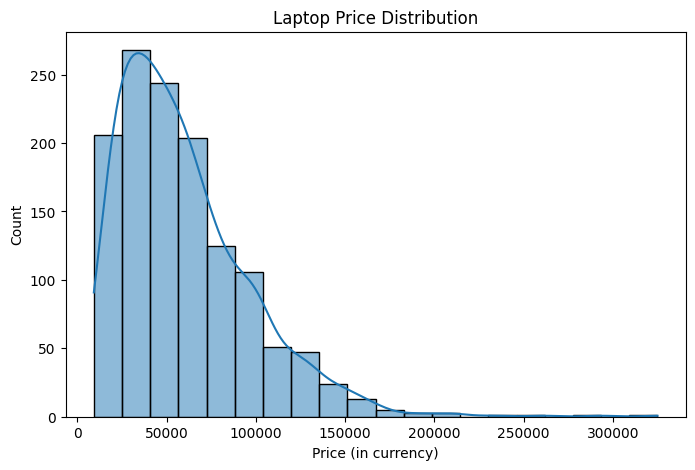

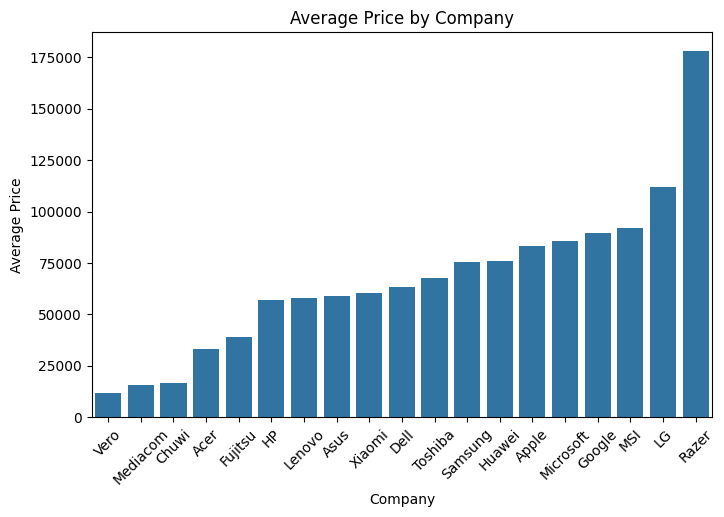

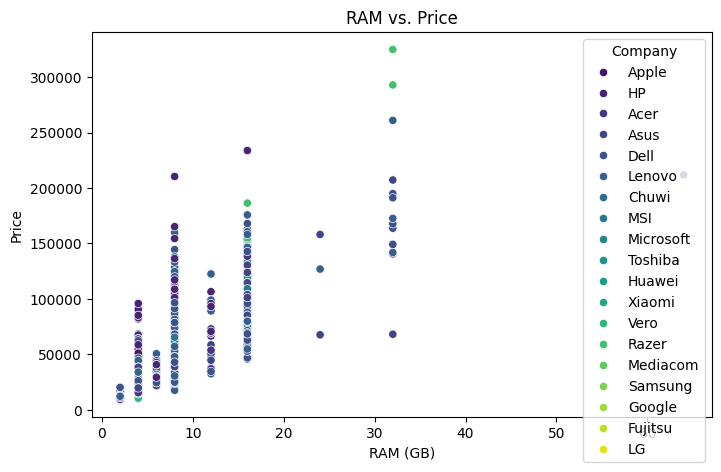

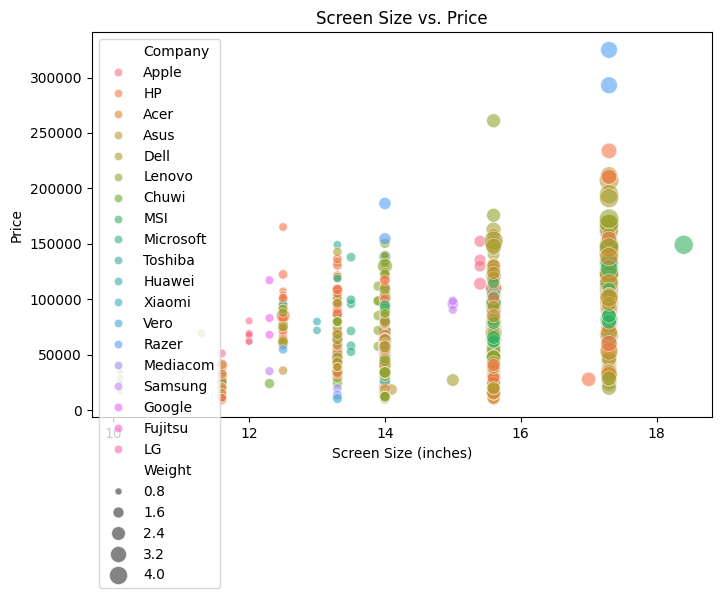

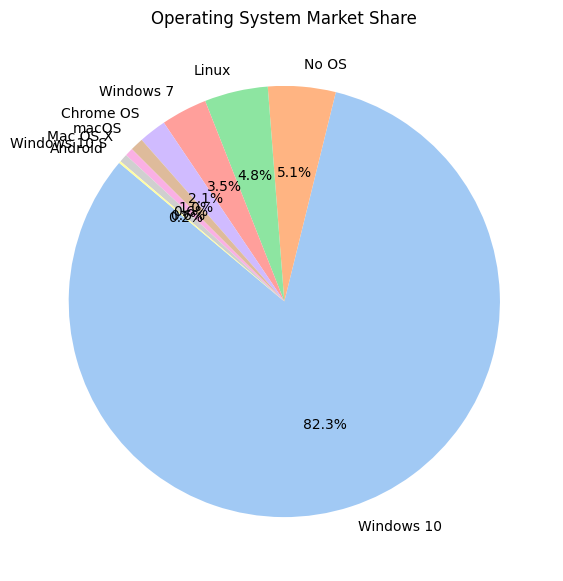

In [12]:
# Load JSON data into a pandas DataFrame
df = pd.read_json("/content/csvjson.json")  # Replace with actual file path

# 1. Price Distribution (Histogram)
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title("Laptop Price Distribution")
plt.xlabel("Price (in currency)")
plt.ylabel("Count")
plt.show()

# 2. Company-wise Average Price (Bar Chart)
avg_price = df.groupby("Company")["Price"].mean().sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title("Average Price by Company")
plt.xlabel("Company")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

# 3. RAM vs. Price (Scatter Plot)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Ram"].str.replace("GB", "").astype(int), y=df["Price"], hue=df["Company"], palette="viridis")
plt.title("RAM vs. Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price")
plt.show()

# 4. Screen Size vs. Price (Bubble Chart)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Inches"], y=df["Price"], size=df["Weight"].str.replace("kg", "").astype(float), hue=df["Company"], sizes=(20, 200), alpha=0.6)
plt.title("Screen Size vs. Price")
plt.xlabel("Screen Size (inches)")
plt.ylabel("Price")
plt.show()

# 5. OS Market Share (Pie Chart)
os_counts = df["OpSys"].value_counts()
plt.figure(figsize=(7,7))
plt.pie(os_counts, labels=os_counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Operating System Market Share")
plt.show()

In [13]:
!pip install dash

In [14]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html

# Load JSON data into a pandas DataFrame
df = pd.read_json("/content/csvjson.json")  # Replace with actual file path
df["Ram"] = df["Ram"].str.replace("GB", "").astype(int)
df["Weight"] = df["Weight"].str.replace("kg", "").astype(float)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Laptop Data Dashboard", style={'textAlign': 'center'}),

    dcc.Graph(
        id='price-dist',
        figure=px.histogram(df, x='Price', nbins=20, title='Laptop Price Distribution', marginal='box')
    ),

    dcc.Graph(
        id='avg-price',
        figure=px.bar(df.groupby("Company")["Price"].mean().reset_index(), x="Company", y="Price", title="Average Price by Company")
    ),

    dcc.Graph(
        id='ram-vs-price',
        figure=px.scatter(df, x='Ram', y='Price', color='Company', title='RAM vs. Price')
    ),

    dcc.Graph(
        id='screen-size-vs-price',
        figure=px.scatter(df, x='Inches', y='Price', size='Weight', color='Company', title='Screen Size vs. Price')
    ),

    dcc.Graph(
        id='os-market-share',
        figure=px.pie(df, names='OpSys', title='Operating System Market Share')
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>